In [36]:
import tensorflow as tf
import numpy as np
rng = np.random

import matplotlib.pyplot as plt
learning_rate = 0.0005
training_epochs = 1000
display_step = 100

In [37]:
with tf.name_scope("Creation_of_array"):
    x_array=np.asarray([2.0,9.4,3.32,0.88,-2.23,1.11,0.57,-2.25,-3.31,6.45])
    y_array=np.asarray([1.22,0.34,-0.08,2.25,4.41,3.09,-6.66,-9.77,0.001,2.25])
    x = tf.constant(x_array,dtype = tf.float32)
    y = tf.constant(y_array,dtype = tf.float32)
with tf.name_scope("Calculating_y_mean"):
    mean_y = tf.reduce_mean(y)
    with tf.Session() as sess:
        result_y = sess.run(mean_y)
        print(result_y)

-0.2949


In [38]:
with tf.name_scope("Calculating_x_mean_and_x_variance"):
    mean_x, variance = tf.nn.moments(x, [0])
    with tf.Session() as sess:
        m, v = sess.run([mean_x, variance])
        print(m)
        print(v)


1.594
14.2899


In [39]:
with tf.name_scope("Calculating_covariance"):
    def tensorflow_covariance(x_array,y_array,x_mean,y_mean):
        cov = 0.0
        for i in range(0,10):
            x_val = tf.subtract(x_array[i],x_mean)
            y_val = tf.subtract(y_array[i],y_mean)
            total_val = tf.multiply(x_val,y_val)
            cov = tf.add(cov,total_val)
        return cov/10.0
    with tf.Session() as sess:
        covar = sess.run(tensorflow_covariance(x,y,m,result_y))
        print(covar)


3.83422


In [40]:
with tf.name_scope("Calculating_slope_m_and_c"):
    slope = tf.div(covar,v)
    intm = tf.multiply(slope,m)
    c_intm = tf.subtract(result_y,intm)

    with tf.Session() as sess:
        m_slope = sess.run(slope)
        c = sess.run(c_intm)
        print(m_slope)
        print(c)


0.268316
-0.722596


In [41]:
with tf.name_scope("Finding_theta_1"): 
    y_var = tf.subtract(y,result_y)
    x_var = tf.subtract(x,m)
    mult = tf.multiply(x_var,y_var)
    sumn = tf.reduce_sum(mult)
    x_var2 = tf.multiply(x_var,x_var)
    sumd = tf.reduce_sum(x_var2)
    val = sumn/sumd

    with tf.Session() as sess:
        res = sess.run(val)
        print(res)

0.268316


In [42]:
with tf.name_scope("Finding_theta_0"):    
    temp = tf.multiply(res,m)
    theta = tf.subtract(result_y,temp)
    with tf.Session() as sess:
        theta0 = sess.run(theta)
        print(theta0)

-0.722596


Epoch: 0100 cost= 10.119663239 W= -0.0883156 b= 1.0639
Epoch: 0200 cost= 9.788769722 W= 0.0204815 b= 0.999691
Epoch: 0300 cost= 9.646294594 W= 0.0708859 b= 0.932751
Epoch: 0400 cost= 9.544771194 W= 0.0961889 b= 0.866272
Epoch: 0500 cost= 9.456794739 W= 0.110616 b= 0.80155
Epoch: 0600 cost= 9.376886368 W= 0.120248 b= 0.739074
Epoch: 0700 cost= 9.303599358 W= 0.127691 b= 0.678993
Epoch: 0800 cost= 9.236257553 W= 0.13406 b= 0.62131
Epoch: 0900 cost= 9.174352646 W= 0.13984 b= 0.565972
Epoch: 1000 cost= 9.117444038 W= 0.145242 b= 0.512898
Optimization Finished!
Training cost= 9.11744 W= 0.145242 b= 0.512898 



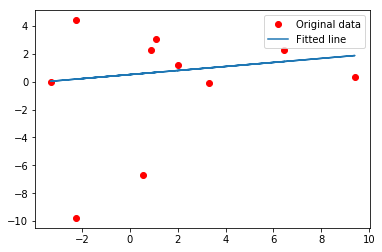

In [43]:
with tf.name_scope("Plotting"):
    n_samples = x_array.shape[0]
    X = tf.placeholder("float")
    Y = tf.placeholder("float")

    # Set model weights
    W = tf.Variable(rng.randn(), name="weight")
    b = tf.Variable(rng.randn(), name="bias")

    # Construct a linear model
    pred = tf.add(tf.multiply(X, W), b)


    # Mean squared error
    cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
    # Gradient descent
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

    # Initializing the variables
    init = tf.global_variables_initializer()

    # Launch the graph
    with tf.Session() as sess:
        sess.run(init)

        # Fit all training data
        for epoch in range(training_epochs):
            for (p, r) in zip(x_array, y_array):
                sess.run(optimizer, feed_dict={X: p, Y: r})

            # Display logs per epoch step
            if (epoch+1) % display_step == 0:
                c = sess.run(cost, feed_dict={X: x_array, Y:y_array})
                print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                    "W=", sess.run(W), "b=", sess.run(b))

        print("Optimization Finished!")
        training_cost = sess.run(cost, feed_dict={X: x_array, Y: y_array})
        print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

        # Graphic display
        plt.plot(x_array, y_array, 'ro', label='Original data')
        plt.plot(x_array, sess.run(W) * x_array + sess.run(b), label='Fitted line')
        plt.legend()
        plt.show()

In [47]:
with tf.name_scope("Finding_root_mean_square_error"):
    rms = tf.sqrt(tf.reduce_mean(tf.squared_difference(x_array, y_array)))
    with tf.Session() as sess:
        rmse=sess.run(rms)
        print(rmse)


5.30626913189
